In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')
print(data)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

# **Label Encode**

In [ ]:
print(data['VisitorType'].value_counts())
print(' ')
print(data['Month'].value_counts())
print(' ')
print(data['Weekend'].value_counts())
print(' ')
print(data['Revenue'].value_counts())

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
 
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
 
False    9462
True     2868
Name: Weekend, dtype: int64
 
False    10422
True      1908
Name: Revenue, dtype: int64


In [ ]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['Month']= label_encoder.fit_transform(data['Month'])
print(data['Month'].unique())

data['VisitorType']= label_encoder.fit_transform(data['VisitorType'])
print(data['VisitorType'].unique())

data['Weekend']= label_encoder.fit_transform(data['Weekend'])
print(data['Weekend'].unique())

data['Revenue']= label_encoder.fit_transform(data['Revenue'])
print(data['Revenue'].unique())

[2 5 6 8 4 3 0 7 9 1]
[2 0 1]
[0 1]
[0 1]


In [ ]:
print(data['VisitorType'].value_counts())
print(' ')
print(data['Month'].value_counts())
print(' ')
print(data['Weekend'].value_counts())
print(' ')
print(data['Revenue'].value_counts())

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64
 
6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64
 
0    9462
1    2868
Name: Weekend, dtype: int64
 
0    10422
1     1908
Name: Revenue, dtype: int64


In [ ]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,2,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,2,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,2,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,2,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,2,4,1,2,2,0,0


In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

# **Identify and remove outliers**

In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


- compare mean to max -- columns that have really large outliers are :
1. Administrative_Duration
2. ProductRelated_Duration

The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier.


For Informational Duration and Page Values, 25, 50 and 75 are all 0 so used other two columns


In [ ]:
import plotly.express as px 
fig = px.histogram(data, x='Administrative_Duration')
fig2 = px.histogram(data, x='ProductRelated_Duration')
fig.show()
fig2.show()

In [ ]:
#create a box plot
fig = px.box(data, x='Administrative_Duration')
fig2 = px.box(data, x='ProductRelated_Duration')
fig.show()
fig2.show()

For each one, the data does not follow a normal distribution. Since the data is skewed, instead of using a z-score we can use interquartile range (IQR) to determine the outliers.

In [ ]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR =Q3- Q1

  lower_bound = Q1 -1.5 *IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return ls

didnt use page values, just the others

In [ ]:
index_list= []
for feature in ['Administrative_Duration', 'ProductRelated_Duration' ]:
  index_list.extend(outliers(data,feature))

In [ ]:
def remove(df, ls):
  ls = sorted(set(ls))
  df= df.drop(ls)
  return df

In [ ]:
df_cleaned = remove(data, index_list)

In [ ]:
df_cleaned.shape

(10467, 18)

In [ ]:
data.shape

(12330, 18)

In [ ]:
df_cleaned.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000
mean,1.604662,36.259147,0.337346,20.959281,21.961116,741.160616,0.024862,0.046958,5.483737,0.065444,5.104901,2.124391,2.364192,3.159645,4.114550,1.701443,0.230439,0.135664
std,2.442930,56.192433,0.976302,102.611044,22.490491,771.708313,0.051980,0.051411,18.620777,0.204201,2.352201,0.931437,1.739803,2.404734,4.049848,0.707445,0.421134,0.342448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,144.500000,0.000000,0.014956,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,15.000000,471.400000,0.002532,0.028564,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,3.000000,58.033333,0.000000,0.000000,30.000000,1101.568333,0.020000,0.053597,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,19.000000,233.083333,16.000000,2252.033333,223.000000,3382.287999,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [ ]:
df_cleaned['Revenue'].value_counts()

0    9047
1    1420
Name: Revenue, dtype: int64

In [ ]:
import plotly.express as px 
fig = px.histogram(df_cleaned, x='Administrative_Duration')
fig2 = px.histogram(df_cleaned, x='ProductRelated_Duration')
fig.show()
fig2.show()

In [ ]:
df_cleaned.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000,10467.000000
mean,1.604662,36.259147,0.337346,20.959281,21.961116,741.160616,0.024862,0.046958,5.483737,0.065444,5.104901,2.124391,2.364192,3.159645,4.114550,1.701443,0.230439,0.135664
std,2.442930,56.192433,0.976302,102.611044,22.490491,771.708313,0.051980,0.051411,18.620777,0.204201,2.352201,0.931437,1.739803,2.404734,4.049848,0.707445,0.421134,0.342448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,144.500000,0.000000,0.014956,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,15.000000,471.400000,0.002532,0.028564,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,3.000000,58.033333,0.000000,0.000000,30.000000,1101.568333,0.020000,0.053597,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,19.000000,233.083333,16.000000,2252.033333,223.000000,3382.287999,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


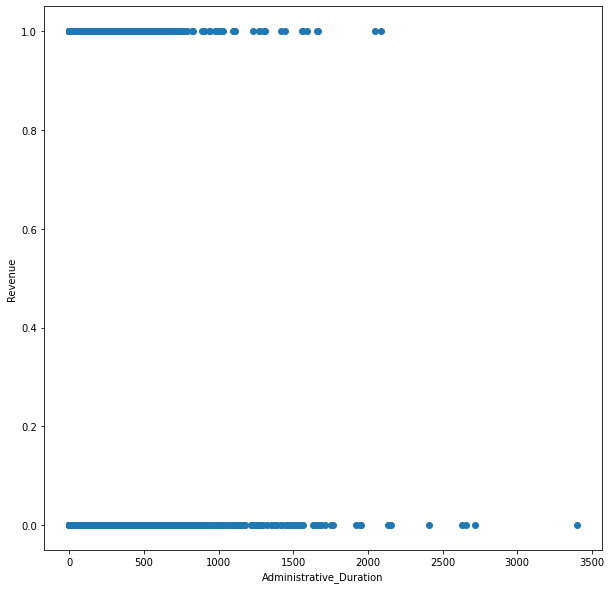

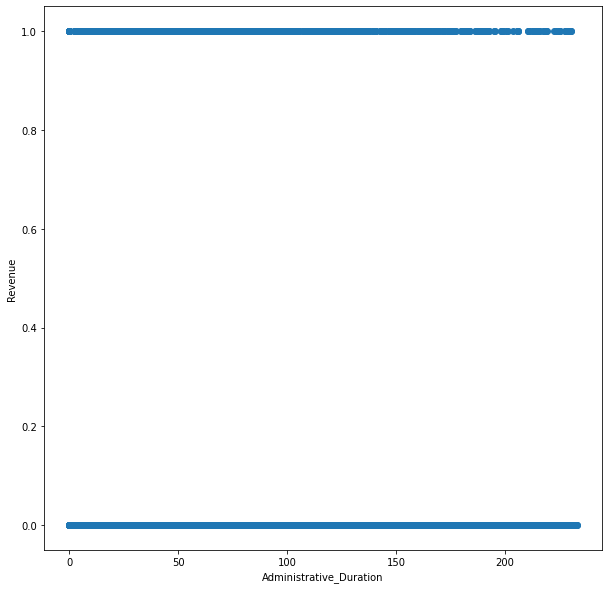

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(data['Administrative_Duration'], data['Revenue'])
ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('Revenue')
plt.show()

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_cleaned['Administrative_Duration'], df_cleaned['Revenue'])
ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('Revenue')
plt.show()

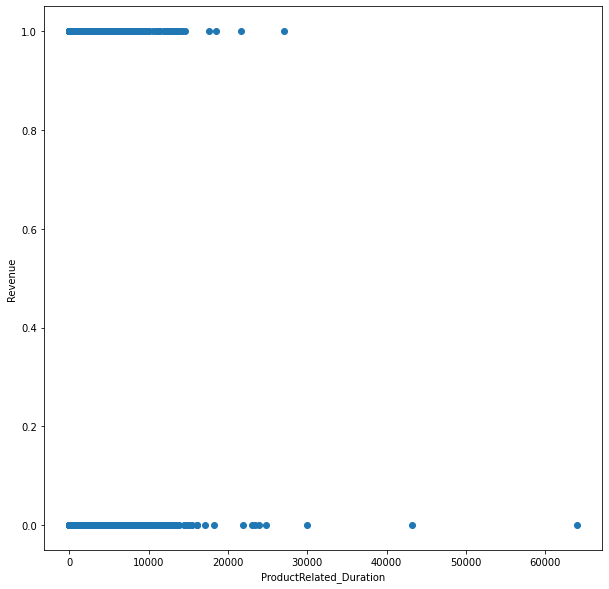

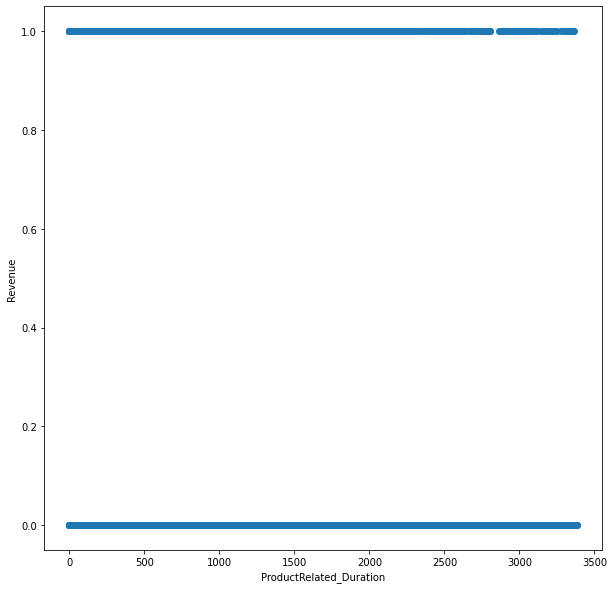

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(data['ProductRelated_Duration'], data['Revenue'])
ax.set_xlabel('ProductRelated_Duration')
ax.set_ylabel('Revenue')
plt.show()


import matplotlib.pyplot as plt
# Scatter plot
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(df_cleaned['ProductRelated_Duration'], df_cleaned['Revenue'])
ax.set_xlabel('ProductRelated_Duration')
ax.set_ylabel('Revenue')
plt.show()

# **Splitting data and applying SMOTE**

In [ ]:
df_cleaned.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
from sklearn.utils import shuffle
df_cleaned = shuffle(df_cleaned)

In [ ]:
df_cleaned

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
773,7,159.333333,0,0.0,24,520.666667,0.000000,0.006667,0.000000,0.0,5,2,10,4,3,0,1,0
7488,1,18.200000,0,0.0,44,1310.500000,0.042222,0.065926,0.000000,0.0,8,2,2,1,13,2,0,0
4990,5,73.500000,1,55.0,41,1705.041667,0.004545,0.023983,7.259750,0.0,6,2,4,2,2,2,0,0
2706,0,0.000000,0,0.0,15,272.333333,0.013333,0.020000,0.000000,1.0,6,1,1,1,3,2,1,0
8989,4,104.250000,0,0.0,38,1429.875000,0.000000,0.022807,4.113391,0.0,7,2,2,1,13,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,0,0.000000,1,55.0,38,1377.409524,0.000877,0.018860,0.000000,0.0,6,2,2,2,4,2,0,0
2054,0,0.000000,0,0.0,3,137.000000,0.000000,0.100000,0.000000,0.0,5,2,2,3,2,2,0,0
2326,0,0.000000,0,0.0,22,1443.250000,0.063636,0.109091,0.000000,0.8,6,2,2,1,13,2,0,0
11467,1,14.000000,0,0.0,7,170.750000,0.000000,0.025000,0.000000,0.0,7,1,1,1,2,0,0,0


In [ ]:
data=df_cleaned

In [ ]:
x = data.drop(['Revenue'], axis=1)
y = data['Revenue']
print(x.shape)
print(y.shape)

(10467, 17)
(10467,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.75)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(10467, 17)
(7850, 17)
(2617, 17)


In [ ]:
print('Training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('Test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')

Training data has 7850 observation with 17 features
Test data has 2617 observation with 17 features


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
print(data['Revenue'].value_counts())

0    9047
1    1420
Name: Revenue, dtype: int64


Final counter: Counter({0: 9047, 1: 1420})

# **Machine Learning Models**

# **KNN** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
knn_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of KNN = {} '.format(knn_accuracy))

Accuracy of KNN = 0.8872755063049294 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy= []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    knn_accuracy = metrics.accuracy_score(y_test, y_predict)
    accuracy.append(knn_accuracy)
    print('Accuracy of KNN for' , i, 'neighoburs' , knn_accuracy)

print('Max: ', max(accuracy))

Accuracy of KNN for 1 neighoburs 0.8612915552158961
Accuracy of KNN for 2 neighoburs 0.8861291555215896
Accuracy of KNN for 3 neighoburs 0.8842185708826901
Accuracy of KNN for 4 neighoburs 0.8888039740160489
Accuracy of KNN for 5 neighoburs 0.8872755063049294
Accuracy of KNN for 6 neighoburs 0.8903324417271685
Accuracy of KNN for 7 neighoburs 0.8899503247993886
Accuracy of KNN for 8 neighoburs 0.8937714940771876
Accuracy of KNN for 9 neighoburs 0.8937714940771876
Accuracy of KNN for 10 neighoburs 0.8933893771494077
Accuracy of KNN for 11 neighoburs 0.8914787925105082
Accuracy of KNN for 12 neighoburs 0.8945357279327474
Accuracy of KNN for 13 neighoburs 0.8930072602216278
Accuracy of KNN for 14 neighoburs 0.8933893771494077
Accuracy of KNN for 15 neighoburs 0.8933893771494077
Accuracy of KNN for 16 neighoburs 0.8907145586549484
Accuracy of KNN for 17 neighoburs 0.8907145586549484
Accuracy of KNN for 18 neighoburs 0.8895682078716087
Accuracy of KNN for 19 neighoburs 0.8891860909438288
Ac

n_neighbors = 4 from accuracy

In [ ]:
from sklearn.metrics import roc_auc_score
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
print(classification_report(y_test, y_predict))
print( 'ROC AUC Score: ', roc_auc_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2259
           1       0.73      0.30      0.42       358

    accuracy                           0.89      2617
   macro avg       0.81      0.64      0.68      2617
weighted avg       0.88      0.89      0.87      2617

ROC AUC Score:  0.6394125546232203


Confusion Matrix:  [[2220   39]
 [ 252  106]]


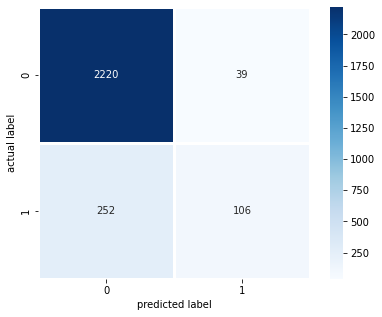

In [ ]:
cm_knn = confusion_matrix(y_test, y_predict)
print('Confusion Matrix: ' , cm_knn)
plt.figure(figsize=(7,5))
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
recall_knn = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_knn)

# Precision Score
precision_knn = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_knn)

# F1 Score
f1_score_knn = metrics.f1_score(y_test, y_predict, average='binary')
print('F1 Score: ', f1_score_knn)

Recall Score:  0.29608938547486036
Precision Score:  0.7310344827586207
F1 Score:  0.42147117296222664


# **Logistic Regression**  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', max_iter=1000)
log.fit(x_train, y_train)
y_predict = log.predict(x_test)
log_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Logistic Regression = {} '.format(log_accuracy))

Accuracy of Logistic Regression = 0.9025601834161253 


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# correct hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.01, 0.05, 0.1, 0.5, 1, 5, 10),
          'solver': ['newton-cg', 'liblinear', 'lbfgs']}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid=lr_params, cv= 5, n_jobs=-1, return_train_score=True)
grid_result = grid_search.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver 

In [ ]:
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimators:  LogisticRegression(C=0.05, solver='liblinear')


In [ ]:
#with new parameters

In [ ]:
log= LogisticRegression(C=0.05, solver='liblinear')
log.fit(x_train, y_train)
y_predict = log.predict(x_test)
log_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Logistic Regression = {} '.format(log_accuracy))
print(classification_report(y_test, y_predict))
print( 'ROC AUC Score: ', roc_auc_score(y_test, y_predict))

Accuracy of Logistic Regression = 0.9010317157050057 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2259
           1       0.73      0.44      0.55       358

    accuracy                           0.90      2617
   macro avg       0.82      0.71      0.75      2617
weighted avg       0.89      0.90      0.89      2617

ROC AUC Score:  0.7064362042828066


[[2201   58]
 [ 201  157]]


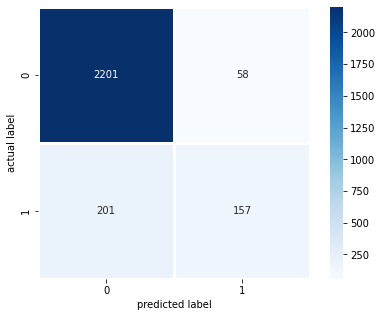

In [ ]:
cm_lr = confusion_matrix(y_test, y_predict)
print(cm_lr)
plt.figure(figsize=(7,5))
sns.heatmap(cm_lr, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
recall_logreg = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_logreg)

# Precision Score
precision_logreg = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_logreg)

# F1 Score
f1_score_logreg = metrics.f1_score(y_test, y_predict, average='binary')
print('F1 Score: ', f1_score_logreg)

Recall Score:  0.43854748603351956
Precision Score:  0.7302325581395349
F1 Score:  0.5479930191972077


# **Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
randomForest = RandomForestClassifier(n_estimators= 100)
randomForest.fit(x_train, y_train)
y_predict = randomForest.predict(x_test)
forest_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Random Forest = {} '.format(forest_accuracy))

Accuracy of Random Forest = 0.9136415743217424 


In [ ]:
# hyperparameter tuning for random forest
grid = {'n_estimators': [10,50,100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,5,10]}

grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=grid, cv= 5, n_jobs=-1, return_train_score=True)
grid_result = grid_search.fit(x_train, y_train)

In [ ]:
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best estimators:  RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=10)


In [ ]:
randomForest = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=10)
randomForest.fit(x_train, y_train)
y_predict = randomForest.predict(x_test)
forest_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Random Forest = {} '.format(forest_accuracy))

Accuracy of Random Forest = 0.9132594573939625 


In [ ]:
print(classification_report(y_test, y_predict))
print( 'ROC AUC Score: ', roc_auc_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2259
           1       0.72      0.59      0.65       358

    accuracy                           0.91      2617
   macro avg       0.83      0.78      0.80      2617
weighted avg       0.91      0.91      0.91      2617

ROC AUC Score:  0.7793364097922401


[[2177   82]
 [ 145  213]]


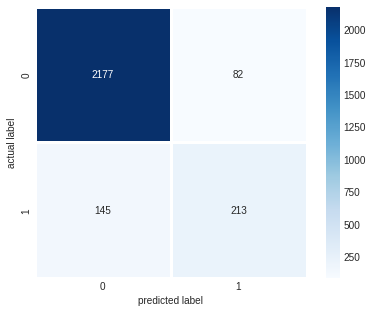

In [ ]:
cm_rF = confusion_matrix(y_test, y_predict)
print(cm_rF)
plt.figure(figsize=(7,5))
sns.heatmap(cm_rF, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
recall_rf = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_rf)

# Precision Score
precision_rf = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_rf)

# F1 Score
f1_score_rf = metrics.f1_score(y_test, y_predict, average='binary')
print('F1 Score: ', f1_score_rf)

Recall Score:  0.5949720670391061
Precision Score:  0.7220338983050848
F1 Score:  0.6523736600306279


# **XGboost**  


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_predict4 = model.predict(x_test)
xg_accuracy = metrics.accuracy_score(y_test, y_predict4)
print('Accuracy of XGBoost = {} '.format(xg_accuracy))

Accuracy of XGBoost = 0.9082919373328239 


In [ ]:
# hyperparameter tuning for extreme boosting tree aka xgboost
from sklearn.model_selection import GridSearchCV
params_xgb = {
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.4, 0.6, 0.8],
    'max_depth': [1,5,10,15],
    'n_estimators':[10,40,60],
    'learning_rate':[0.1, 0.4, 0.8, 1.6],
        }

grid_searchxg = GridSearchCV(estimator = XGBClassifier(), param_grid=params_xgb, cv= 5, n_jobs=-1, return_train_score=True)
grid_result = grid_searchxg.fit(x_train, y_train)
print('Best Parameters: ', grid_searchxg.best_params_)
print('Best estimators: ', grid_searchxg.best_estimator_)

[09:12:01] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Best Parameters:  {'learning_rate': 0.8, 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.4}
Best estimators:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_features='sqrt',
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)


In [ ]:
model = XGBClassifier(learning_rate=0.8, max_depth=11, max_features='sqrt',n_estimators=10, subsample=0.4)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
xg_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of XGBoost = {} '.format(xg_accuracy))
print( 'ROC AUC Score: ', roc_auc_score(y_test, y_predict))

[09:12:48] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Accuracy of XGBoost = 0.899885364921666 
ROC AUC Score:  0.7798167973667095


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2259
           1       0.64      0.61      0.63       358

    accuracy                           0.90      2617
   macro avg       0.79      0.78      0.78      2617
weighted avg       0.90      0.90      0.90      2617



[[2135  124]
 [ 138  220]]


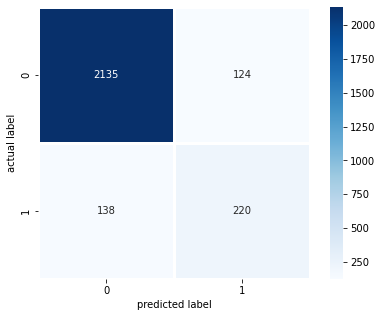

In [ ]:
cm_xg = confusion_matrix(y_test, y_predict)
print(cm_xg)
plt.figure(figsize=(7,5))
sns.heatmap(cm_xg, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
recall_xg = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_xg)

# Precision Score
precision_xg = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_xg)

# F1 Score
f1_score_xg = metrics.f1_score(y_test, y_predict, average='binary')
print('F1 Score: ', f1_score_xg)

Recall Score:  0.6145251396648045
Precision Score:  0.6395348837209303
F1 Score:  0.6267806267806268


In [ ]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

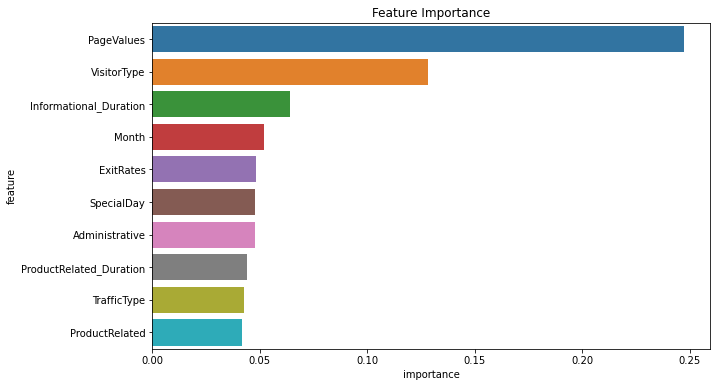

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# **AdaBoost** 


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9017959495605655


In [ ]:
abm_param_grid = {'n_estimators': [10,50, 120, 200], 
                  'learning_rate':[0.01,0.1,0.5,1]} 

abm_grid = GridSearchCV(AdaBoostClassifier(),param_grid=abm_param_grid,cv= 5, n_jobs=-1, return_train_score=True)

grid_search = abm_grid.fit(x_train, y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 10}
Best estimators:  AdaBoostClassifier(learning_rate=0.5, n_estimators=10)


In [ ]:
model = AdaBoostClassifier(learning_rate=0.5, n_estimators=10)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
ada_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of XGBoost = {} '.format(ada_accuracy))

Accuracy of XGBoost = 0.9059992357661445 


In [ ]:
print(classification_report(y_test, y_predict))
print( 'ROC AUC Score: ', roc_auc_score(y_test, y_predict))
cm_ada = confusion_matrix(y_test, y_predict)
print(cm_ada)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2259
           1       0.66      0.65      0.65       358

    accuracy                           0.91      2617
   macro avg       0.80      0.80      0.80      2617
weighted avg       0.91      0.91      0.91      2617

ROC AUC Score:  0.7962866102319461
[[2140  119]
 [ 127  231]]


In [ ]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
8,PageValues,0.4
7,ExitRates,0.3
10,Month,0.2
15,VisitorType,0.1
9,SpecialDay,0.0
14,TrafficType,0.0
13,Region,0.0
12,Browser,0.0
11,OperatingSystems,0.0
0,Administrative,0.0


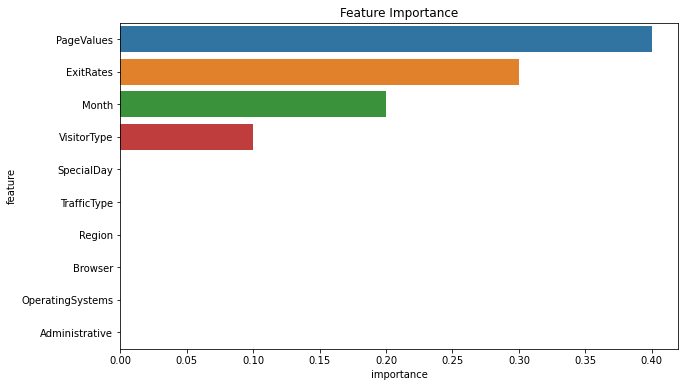

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
recall_ada = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_ada)

# Precision Score
precision_ada = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_ada)

# F1 Score
f1_score_ada = metrics.f1_score(y_test, y_predict, average='binary')
print('F1 Score: ', f1_score_ada)

Recall Score:  0.6452513966480447
Precision Score:  0.66
F1 Score:  0.6525423728813559


# **Naive Bayes** 

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbm = GaussianNB()
nbm.fit(x_train, y_train)
nbm_pred = nbm.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, nbm_pred))

Accuracy: 0.834543370271303


In [ ]:
from seaborn.matrix import Grid
nb_param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid = GridSearchCV(GaussianNB(), param_grid = nb_param_grid,cv= 5, n_jobs=-1, return_train_score=True)

grid_search = nb_grid.fit(x_train, y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'var_smoothing': 1.2328467394420658e-05}
Best estimators:  GaussianNB(var_smoothing=1.2328467394420658e-05)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nbm = GaussianNB(var_smoothing=  1.2328467394420658e-05)
nbm.fit(x_train, y_train)
nbm_pred = nbm.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, nbm_pred))

Accuracy: 0.8895682078716087


In [ ]:
print(classification_report(y_test, nbm_pred))
print( 'ROC AUC Score: ', roc_auc_score(y_test, nbm_pred))
cm_nb = confusion_matrix(y_test, nbm_pred)
print(cm_nb)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2259
           1       0.61      0.52      0.56       358

    accuracy                           0.89      2617
   macro avg       0.77      0.73      0.75      2617
weighted avg       0.88      0.89      0.89      2617

ROC AUC Score:  0.7327048108002504
[[2143  116]
 [ 173  185]]


In [ ]:
recall_ada = metrics.recall_score(y_test, nbm_pred)
print('Recall Score: ', recall_ada)

# Precision Score
precision_ada = metrics.precision_score(y_test, nbm_pred)
print("Precision Score: ", precision_ada)

# F1 Score
f1_score_ada = metrics.f1_score(y_test, nbm_pred, average='binary')
print('F1 Score: ', f1_score_ada)

Recall Score:  0.5167597765363129
Precision Score:  0.6146179401993356
F1 Score:  0.5614567526555387


# **Support Vector**


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))

Accuracy: 0.888421857088269


In [ ]:
#hyperparameter tuning
svm_param_grid = { 'C':[0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
svm_grid = GridSearchCV(estimator = SVC(), param_grid = svm_param_grid, cv = 5, n_jobs = -1, return_train_score=True)     
grid_result = svm_grid.fit(x_train, y_train)

In [ ]:
print('Best Parameters: ', svm_grid.best_params_)
print('Best estimators: ', svm_grid.best_estimator_)

Best Parameters:  {'C': 1, 'gamma': 0.01}
Best estimators:  SVC(C=1, gamma=0.01)


In [ ]:
#using best parameters
svm = SVC(C=1, gamma=0.01)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))

print(classification_report(y_test, svm_pred))
print( 'ROC AUC Score: ', roc_auc_score(y_test, svm_pred))

Accuracy: 0.8647306075659151
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2259
           1       0.67      0.02      0.04       358

    accuracy                           0.86      2617
   macro avg       0.77      0.51      0.49      2617
weighted avg       0.84      0.86      0.81      2617

ROC AUC Score:  0.5102878368586486


[[2255    4]
 [ 350    8]]


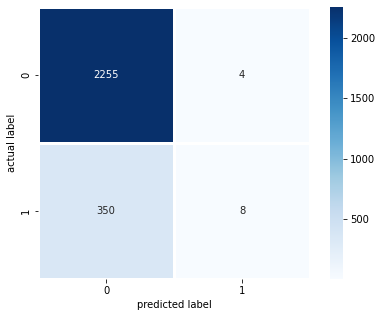

In [ ]:
cm = confusion_matrix(y_test, svm_pred)
print(cm)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
recall_svm = metrics.recall_score(y_test, svm_pred)
print('Recall Score: ', recall_svm)

# Precision Score
precision_svm = metrics.precision_score(y_test, svm_pred)
print("Precision Score: ", precision_svm)

# F1 Score
f1_score_svm = metrics.f1_score(y_test, svm_pred, average='binary')
print('F1 Score: ', f1_score_svm)

Recall Score:  0.0223463687150838
Precision Score:  0.6666666666666666
F1 Score:  0.043243243243243246


# **Decision Tree Classifier** 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

<ipython-input-101-fed2d2217168>:16: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [ ]:
tree = DecisionTreeClassifier(random_state= 42)
tree.fit(x_train, y_train)
y_predict = tree.predict(x_test)
tree_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Decision Tree = {} '.format(tree_accuracy))

Accuracy of Decision Tree = 0.8716087122659534 


In [ ]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,12],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':list(range(1, 16)),
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42), param_grid=params_dt, cv= 5, n_jobs=-1, verbose= 0 , scoring = "roc_auc", return_train_score=True)
grid_result = grid_search.fit(x_train, y_train)
print('Best Parameters: ', grid_search.best_params_)
print('Best estimators: ', grid_search.best_estimator_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}
Best estimators:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=42)


In [ ]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=42)
tree.fit(x_train, y_train)
y_predict = tree.predict(x_test)
tree_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Decision Tree = {} '.format(tree_accuracy))
cm_tree = confusion_matrix(y_test, y_predict)
print(cm_tree)
print( 'ROC AUC Score: ', roc_auc_score(y_test, y_predict))

Accuracy of Decision Tree = 0.9075277034772641 
[[2136  123]
 [ 119  239]]
ROC AUC Score:  0.8065744470905949


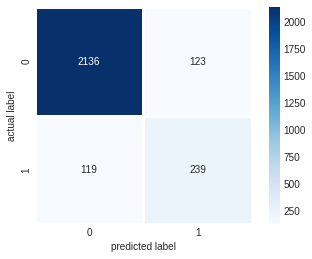

In [ ]:
# Heatmap Confusion matrix
sns.heatmap(cm_tree, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
recall_dt = metrics.recall_score(y_test, y_predict)
print('Recall Score: ', recall_dt)

# Precision Score
precision_dt = metrics.precision_score(y_test, y_predict)
print("Precision Score: ", precision_dt)

# F1 Score
f1_score_dt = metrics.f1_score(y_test, y_predict, average='binary')
print('F1 Score: ', f1_score_dt)

Recall Score:  0.6675977653631285
Precision Score:  0.6602209944751382
F1 Score:  0.663888888888889


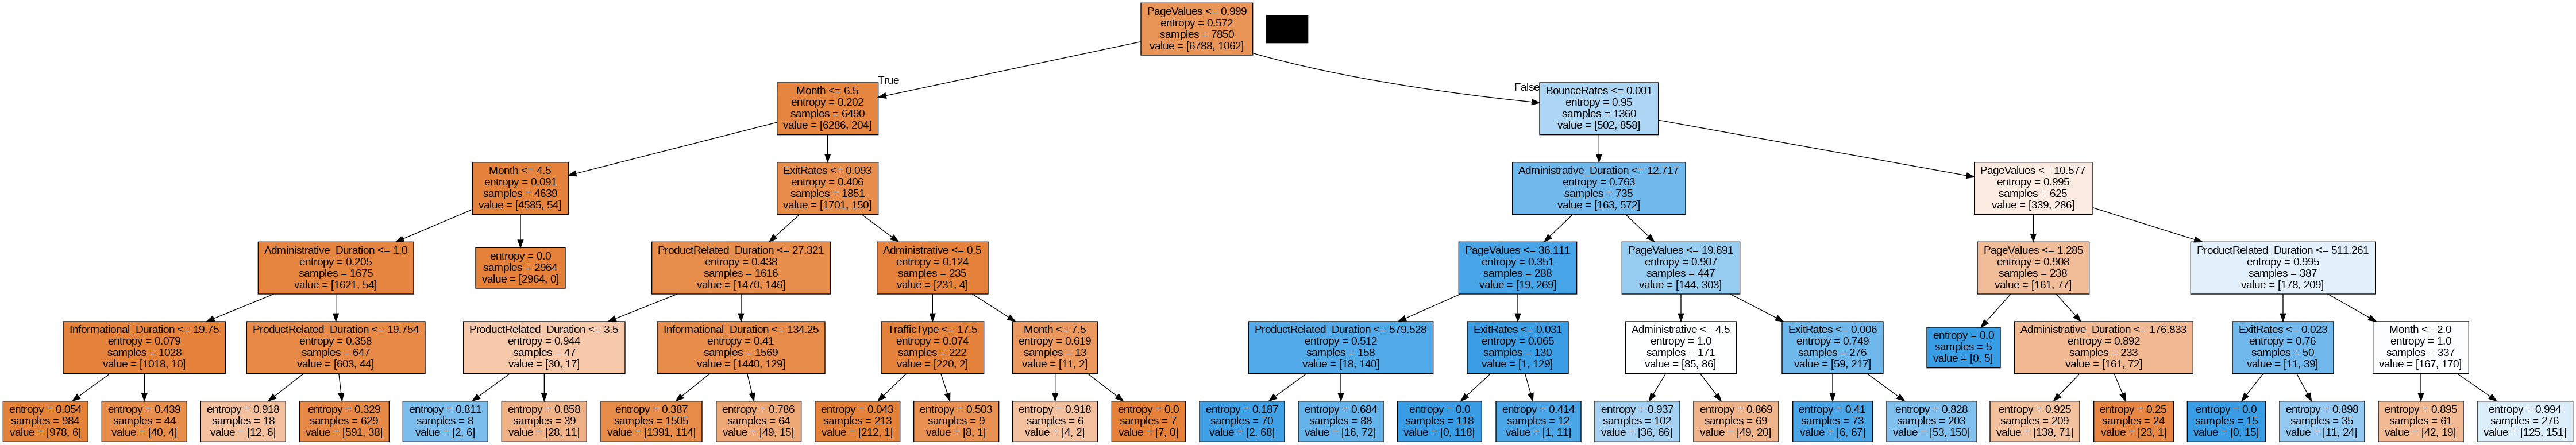

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,min_samples_split= 2, random_state=42)
tree.fit(x_train, y_train)
graph2, = print_tree(tree, features=x_train.columns)
Image(graph2.create_png())

# **Plot AUC_ROC Curve**

In [ ]:
plt.figure(0).clf()

<Figure size 432x288 with 0 Axes>

[09:39:41] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



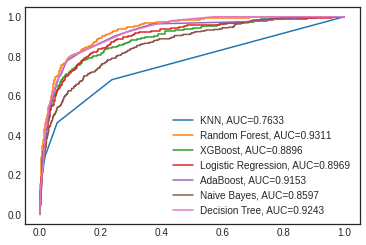

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,min_samples_split=10)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.8, max_depth=11, max_features='sqrt',n_estimators=10, subsample=0.4)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.05, solver='liblinear')
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier(learning_rate=0.5, n_estimators=10)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="AdaBoost, AUC="+str(auc))

from sklearn.naive_bayes import GaussianNB
model= GaussianNB(var_smoothing= 1.2328467394420658e-05)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

plt.legend()